In [1]:
import matplotlib.pyplot as plt

from config import get_config
from train import train_model

cfg = get_config()

In [2]:
cfg["val_seq_len"] = 1

if cfg['tgt_seq_len'] < cfg['val_seq_len']:
    raise ValueError("Tensors must have the same shape.")

train_model(cfg)

Using device: cpu


Processing Epoch 00: 100%|██████████| 672/672 [02:50<00:00,  3.94it/s, loss=14702.845]


Training loss of epoch 0: 22799.257983979725


  0%|          | 0/23 [00:00<?, ?it/s]


TypeError: greedy_decode() missing 1 required positional argument: 'device'

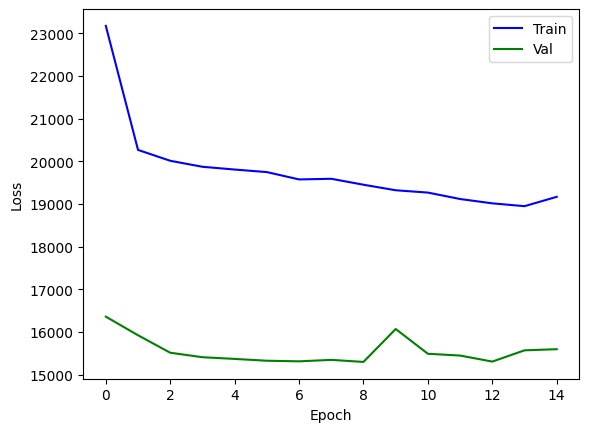

In [9]:
gen_path = f'./loss/run{cfg["run"]}/'
loss_paths = [f'{gen_path}training_loss.txt', f'{gen_path}val_loss.txt']

files = {'train': None, 'val': None}
for file_path, loss_key in zip(loss_paths, files.keys()):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        float_lines = list(map(float, lines))
        files[loss_key] = float_lines

d = [i for i in range(len(files['train']))]

plt.figure()
plt.plot(d, files['train'], label="Train", color='b')
plt.plot(d, files['val'], label="Val", color='g')

# Add labels and legend
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Show the plot
plt.show()